<a href="https://colab.research.google.com/github/DavidS-UNCC/ECGR_4105-Souto/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Homework 5

##Problem 1

Problem 1a: 1 hidden layer

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

In [ ]:
# Load data
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)

In [ ]:
# Preprocessing
data['mainroad'] = data['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
data['guestroom'] = data['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
data['basement'] = data['basement'].apply(lambda x: 1 if x == 'yes' else 0)
data['hotwaterheating'] = data['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
data['airconditioning'] = data['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
data['prefarea'] = data['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
# Features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
          'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = data['price'].values

In [ ]:
# Split data: 80% Training, 20% Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

In [ ]:
# Neural network (one hidden layer)
class SingleHiddenLayerNN(nn.Module):
    def __init__(self):
        super(SingleHiddenLayerNN, self).__init__()
        self.hidden = nn.Linear(11, 8)  # 8 nodes in the hidden layer
        self.output = nn.Linear(8, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        return self.output(x)

In [ ]:
# Train/evaluate the model
def train_and_evaluate(model, X_train, y_train, X_val, y_val, epochs=1000, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    train_losses, val_losses = [], []

    start_time = time.time()
    for epoch in range(epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        y_pred_train = model(X_train)
        train_loss = loss_fn(y_pred_train, y_train)
        train_loss.backward()
        optimizer.step()

        # Validation step
        model.eval()
        with torch.no_grad():
            y_pred_val = model(X_val)
            val_loss = loss_fn(y_pred_val, y_val)

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        # Progress (every 100 epochs)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}: Train Loss = {train_loss.item():.4f}, Validation Loss = {val_loss.item():.4f}")

    training_time = time.time() - start_time
    return train_losses, val_losses, training_time

Training Single Hidden Layer NN...
Epoch 0/1000: Train Loss = 25234788843520.0000, Validation Loss = 30129990402048.0000
Epoch 100/1000: Train Loss = 25234470076416.0000, Validation Loss = 30129610817536.0000
Epoch 200/1000: Train Loss = 25233064984576.0000, Validation Loss = 30127968747520.0000
Epoch 300/1000: Train Loss = 25230475001856.0000, Validation Loss = 30124946751488.0000
Epoch 400/1000: Train Loss = 25226798694400.0000, Validation Loss = 30120664367104.0000
Epoch 500/1000: Train Loss = 25222096879616.0000, Validation Loss = 30115184508928.0000
Epoch 600/1000: Train Loss = 25216010944512.0000, Validation Loss = 30108047900672.0000
Epoch 700/1000: Train Loss = 25208362631168.0000, Validation Loss = 30099042729984.0000
Epoch 800/1000: Train Loss = 25199567175680.0000, Validation Loss = 30088703770624.0000
Epoch 900/1000: Train Loss = 25189729435648.0000, Validation Loss = 30077127491584.0000


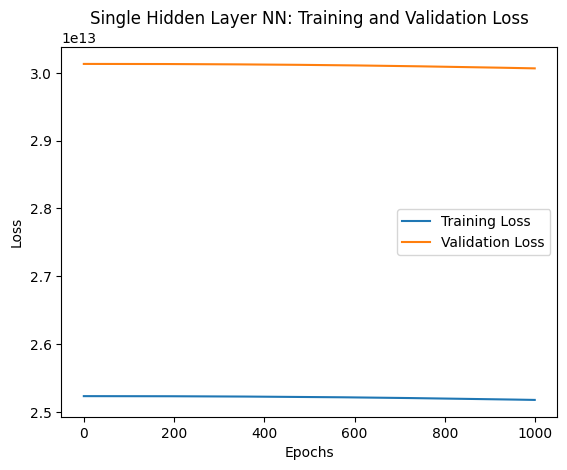

In [ ]:
# Train model
print("Training Single Hidden Layer NN...")
single_hidden_model = SingleHiddenLayerNN()
train_losses_1a, val_losses_1a, train_time_1a = train_and_evaluate(single_hidden_model, X_train, y_train, X_val, y_val)

# Plot losses
plt.plot(train_losses_1a, label='Training Loss')
plt.plot(val_losses_1a, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Single Hidden Layer NN: Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Results
print("\nSingle Hidden Layer NN:")
print(f"Training Time: {train_time_1a:.2f} seconds")
print(f"Final Training Loss: {train_losses_1a[-1]:.4f}")
print(f"Final Validation Loss: {val_losses_1a[-1]:.4f}")


Single Hidden Layer NN:
Training Time: 1.25 seconds
Final Training Loss: 25179008794624.0000
Final Validation Loss: 30064511025152.0000


Problem 1b: 3 hidden layers

In [ ]:
# Extend the network with two additional hidden layers
class MultiHiddenLayerNN(nn.Module):
    def __init__(self):
        super(MultiHiddenLayerNN, self).__init__()
        self.hidden1 = nn.Linear(11, 8)
        self.hidden2 = nn.Linear(8, 16)
        self.hidden3 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        return self.output(x)

Training Multi Hidden Layer NN...
Epoch 0/1000: Train Loss = 25234788843520.0000, Validation Loss = 30129990402048.0000
Epoch 100/1000: Train Loss = 25151299125248.0000, Validation Loss = 30029106905088.0000
Epoch 200/1000: Train Loss = 22489264553984.0000, Validation Loss = 26872450646016.0000
Epoch 300/1000: Train Loss = 11425193918464.0000, Validation Loss = 13772792004608.0000
Epoch 400/1000: Train Loss = 4181826994176.0000, Validation Loss = 5314074640384.0000
Epoch 500/1000: Train Loss = 2524508585984.0000, Validation Loss = 3754679074816.0000
Epoch 600/1000: Train Loss = 1888389693440.0000, Validation Loss = 3175520403456.0000
Epoch 700/1000: Train Loss = 1604609114112.0000, Validation Loss = 2913499086848.0000
Epoch 800/1000: Train Loss = 1414743195648.0000, Validation Loss = 2693898174464.0000
Epoch 900/1000: Train Loss = 1263644049408.0000, Validation Loss = 2506491691008.0000


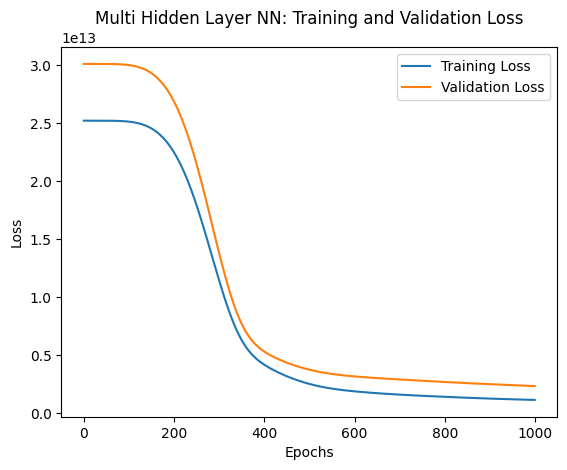

In [ ]:
# Train model
print("Training Multi Hidden Layer NN...")
multi_hidden_model = MultiHiddenLayerNN()
train_losses_1b, val_losses_1b, train_time_1b = train_and_evaluate(multi_hidden_model, X_train, y_train, X_val, y_val)

# Plot losses
plt.plot(train_losses_1b, label='Training Loss')
plt.plot(val_losses_1b, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Multi Hidden Layer NN: Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Results
print("\nMulti Hidden Layer NN:")
print(f"Training Time: {train_time_1b:.2f} seconds")
print(f"Final Training Loss: {train_losses_1b[-1]:.4f}")
print(f"Final Validation Loss: {val_losses_1b[-1]:.4f}")


Multi Hidden Layer NN:
Training Time: 2.30 seconds
Final Training Loss: 1149193289728.0000
Final Validation Loss: 2341441896448.0000


#Problem 2

#Problem 2a: One hidden layer

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

In [ ]:
# Load cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
# Features and target
X = data.data
y = data.target  # 0 = malignant, 1 = benign

In [ ]:
# Split data: 80% Training, 20% Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

In [ ]:
# Neural network (one hidden layer)
class SingleHiddenLayerNN(nn.Module):
    def __init__(self):
        super(SingleHiddenLayerNN, self).__init__()
        self.hidden = nn.Linear(X_train.shape[1], 32)  # 32 nodes in the hidden layer
        self.output = nn.Linear(32, 1)  # Output layer (binary classification)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))  # Sigmoid for binary classification
        return x

In [ ]:
# Train model
def train_and_evaluate(model, X_train, y_train, X_val, y_val, epochs=1000, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.BCELoss()  # Binary cross-entropy loss
    train_losses, val_losses = [], []

    start_time = time.time()
    for epoch in range(epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        y_pred_train = model(X_train)
        train_loss = loss_fn(y_pred_train, y_train)
        train_loss.backward()
        optimizer.step()

        # Validation step
        model.eval()
        with torch.no_grad():
            y_pred_val = model(X_val)
            val_loss = loss_fn(y_pred_val, y_val)

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        # Progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}: Train Loss = {train_loss.item():.4f}, Validation Loss = {val_loss.item():.4f}")

    training_time = time.time() - start_time

    # Evaluate accuracy on validation set
    model.eval()
    with torch.no_grad():
        y_pred_val_class = (model(X_val) >= 0.5).float()  # Convert probabilities to binary classes
        accuracy = accuracy_score(y_val, y_pred_val_class)

    return train_losses, val_losses, accuracy, training_time

In [ ]:
# Train model
print("Training Single Hidden Layer NN...")
single_hidden_model = SingleHiddenLayerNN()
train_losses_2a, val_losses_2a, accuracy_2a, train_time_2a = train_and_evaluate(single_hidden_model, X_train, y_train, X_val, y_val)

Training Single Hidden Layer NN...
Epoch 0/1000: Train Loss = 0.6713, Validation Loss = 0.5498
Epoch 100/1000: Train Loss = 0.0193, Validation Loss = 0.1014
Epoch 200/1000: Train Loss = 0.0058, Validation Loss = 0.1279
Epoch 300/1000: Train Loss = 0.0030, Validation Loss = 0.1631
Epoch 400/1000: Train Loss = 0.0013, Validation Loss = 0.1941
Epoch 500/1000: Train Loss = 0.0006, Validation Loss = 0.2212
Epoch 600/1000: Train Loss = 0.0004, Validation Loss = 0.2434
Epoch 700/1000: Train Loss = 0.0003, Validation Loss = 0.2623
Epoch 800/1000: Train Loss = 0.0002, Validation Loss = 0.2787
Epoch 900/1000: Train Loss = 0.0002, Validation Loss = 0.2936


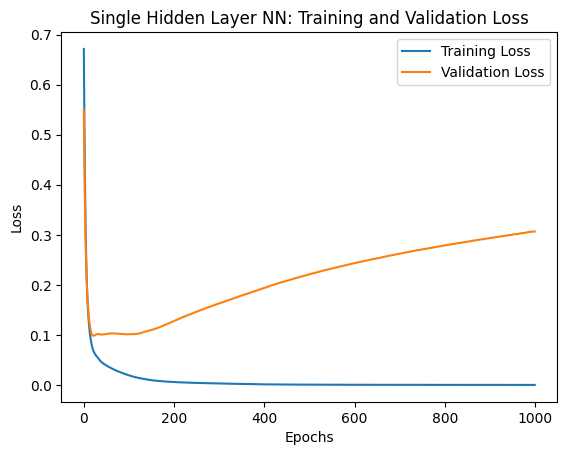

In [ ]:
# Plot losses
plt.plot(train_losses_2a, label='Training Loss')
plt.plot(val_losses_2a, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Single Hidden Layer NN: Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Results
print("\nSingle Hidden Layer NN:")
print(f"Training Time: {train_time_2a:.2f} seconds")
print(f"Final Training Loss: {train_losses_2a[-1]:.4f}")
print(f"Final Validation Loss: {val_losses_2a[-1]:.4f}")
print(f"Validation Accuracy: {accuracy_2a * 100:.2f}%")


Single Hidden Layer NN:
Training Time: 1.72 seconds
Final Training Loss: 0.0001
Final Validation Loss: 0.3067
Validation Accuracy: 93.86%


#Problem 2b: 3 hidden layers

In [ ]:
# 3 hidden layers NN
class MultiHiddenLayerNN(nn.Module):
    def __init__(self):
        super(MultiHiddenLayerNN, self).__init__()
        self.hidden1 = nn.Linear(X_train.shape[1], 32)
        self.hidden2 = nn.Linear(32, 64)
        self.hidden3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = torch.sigmoid(self.output(x))  # Sigmoid for binary classification
        return x

In [ ]:
# Train model
print("Training Multi Hidden Layer NN...")
multi_hidden_model = MultiHiddenLayerNN()
train_losses_2b, val_losses_2b, accuracy_2b, train_time_2b = train_and_evaluate(multi_hidden_model, X_train, y_train, X_val, y_val)

Training Multi Hidden Layer NN...
Epoch 0/1000: Train Loss = 0.6745, Validation Loss = 0.6311
Epoch 100/1000: Train Loss = 0.0000, Validation Loss = 1.0590
Epoch 200/1000: Train Loss = 0.0000, Validation Loss = 1.0799
Epoch 300/1000: Train Loss = 0.0000, Validation Loss = 1.0928
Epoch 400/1000: Train Loss = 0.0000, Validation Loss = 1.1030
Epoch 500/1000: Train Loss = 0.0000, Validation Loss = 1.1111
Epoch 600/1000: Train Loss = 0.0000, Validation Loss = 1.1178
Epoch 700/1000: Train Loss = 0.0000, Validation Loss = 1.1235
Epoch 800/1000: Train Loss = 0.0000, Validation Loss = 1.1286
Epoch 900/1000: Train Loss = 0.0000, Validation Loss = 1.1332


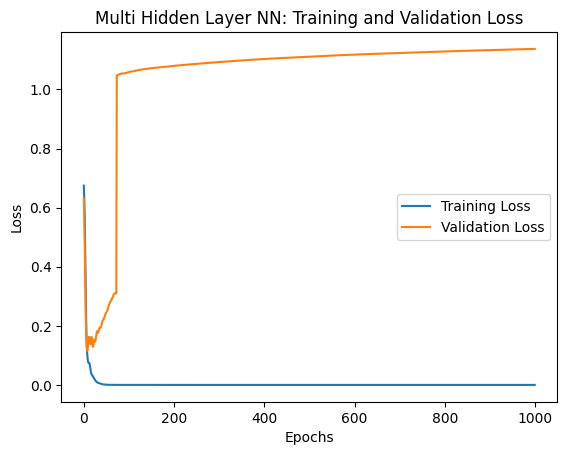

In [ ]:
# Plot losses
plt.plot(train_losses_2b, label='Training Loss')
plt.plot(val_losses_2b, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Multi Hidden Layer NN: Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Results
print("\nMulti Hidden Layer NN:")
print(f"Training Time: {train_time_2b:.2f} seconds")
print(f"Final Training Loss: {train_losses_2b[-1]:.4f}")
print(f"Final Validation Loss: {val_losses_2b[-1]:.4f}")
print(f"Validation Accuracy: {accuracy_2b * 100:.2f}%")


Multi Hidden Layer NN:
Training Time: 2.44 seconds
Final Training Loss: 0.0000
Final Validation Loss: 1.1371
Validation Accuracy: 95.61%


#Problem 3

#Problem 3a: One layer

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images to [-1, 1]
])

train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Data loaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Define neural network (one hidden layer)
class SingleHiddenLayerNN(nn.Module):
    def __init__(self):
        super(SingleHiddenLayerNN, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)  # 256 nodes in the hidden layer
        self.fc2 = nn.Linear(256, 10)  # Output layer (10 classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Train model
def train_and_evaluate(model, train_loader, test_loader, epochs=100, lr=0.001):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()  # For multi-class classification
    train_losses = []

    start_time = time.time()
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0

        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        train_losses.append(epoch_loss / len(train_loader))

        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}: Train Loss = {epoch_loss / len(train_loader):.4f}")

    training_time = time.time() - start_time

    # Evaluate on test set
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            all_preds.extend(torch.argmax(y_pred, dim=1).cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    test_accuracy = accuracy_score(all_labels, all_preds)

    return train_losses, test_accuracy, training_time

In [ ]:
# Train model
print("Training Single Hidden Layer NN...")
single_hidden_model = SingleHiddenLayerNN().to(device)
train_losses_3a, test_accuracy_3a, train_time_3a = train_and_evaluate(single_hidden_model, train_loader, test_loader, epochs=100)

Training Single Hidden Layer NN...
Epoch 0/100: Train Loss = 1.6373
Epoch 10/100: Train Loss = 0.9365
Epoch 20/100: Train Loss = 0.6248
Epoch 30/100: Train Loss = 0.4330
Epoch 40/100: Train Loss = 0.3143
Epoch 50/100: Train Loss = 0.2399
Epoch 60/100: Train Loss = 0.1856
Epoch 70/100: Train Loss = 0.1540
Epoch 80/100: Train Loss = 0.1322
Epoch 90/100: Train Loss = 0.1307


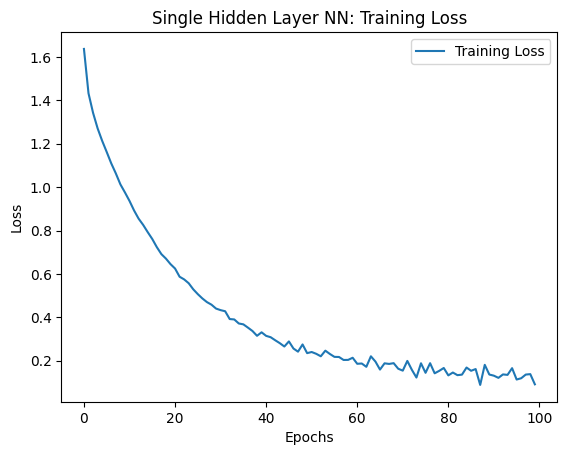

In [ ]:
# Plot loss
plt.plot(train_losses_3a, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Single Hidden Layer NN: Training Loss')
plt.legend()
plt.show()

In [ ]:
# Report results
print("\nSingle Hidden Layer NN:")
print(f"Training Time: {train_time_3a:.2f} seconds")
print(f"Final Training Loss: {train_losses_3a[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy_3a * 100:.2f}%")


Single Hidden Layer NN:
Training Time: 1890.72 seconds
Final Training Loss: 0.0909
Test Accuracy: 49.79%


#Problem 3b: 3 Layers

In [ ]:
# Define neural network (3 hidden layers)
class MultiHiddenLayerNN(nn.Module):
    def __init__(self):
        super(MultiHiddenLayerNN, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
# Train model
print("Training Multi Hidden Layer NN...")
multi_hidden_model = MultiHiddenLayerNN().to(device)
train_losses_3b, test_accuracy_3b, train_time_3b = train_and_evaluate(multi_hidden_model, train_loader, test_loader, epochs=100)

Training Multi Hidden Layer NN...
Epoch 0/100: Train Loss = 1.6539
Epoch 10/100: Train Loss = 0.5986
Epoch 20/100: Train Loss = 0.2050
Epoch 30/100: Train Loss = 0.1306
Epoch 40/100: Train Loss = 0.1286
Epoch 50/100: Train Loss = 0.1058
Epoch 60/100: Train Loss = 0.1059
Epoch 70/100: Train Loss = 0.1119
Epoch 80/100: Train Loss = 0.1066
Epoch 90/100: Train Loss = 0.1014


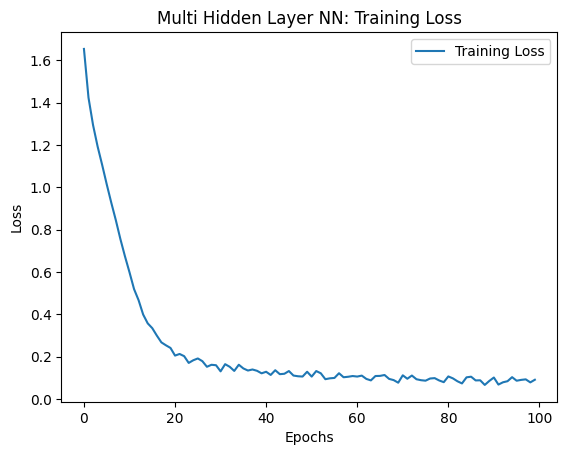

In [ ]:
# Plot loss
plt.plot(train_losses_3b, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Multi Hidden Layer NN: Training Loss')
plt.legend()
plt.show()

In [ ]:
# Report results
print("\nMulti Hidden Layer NN:")
print(f"Training Time: {train_time_3b:.2f} seconds")
print(f"Final Training Loss: {train_losses_3b[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy_3b * 100:.2f}%")


Multi Hidden Layer NN:
Training Time: 2192.78 seconds
Final Training Loss: 0.0909
Test Accuracy: 52.12%
